For this section we will look at simple ways of processing text to do classification. The news 20 dataset is usually how most courses will get into this, but we will look into a kaggle dataset in financial sentiment analysis instead. Please download the dataset from [here](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news). Place the dataset somewhere and change the first line in cell 2 accordingly.

However, I do suggest that you have a browse through the analysis done on news20 dataset as shown in [sklearn docs](https://scikit-learn.org/0.19/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Note that this `cp437` encoding is rare, and do not worry about it. If you ever do require some encoding to read in data it will most likely be "utf-8" or similar.

Also note how I haven't done the label encoder transformation _after_ the train test split. This is probably one of the few functions where it doesn't matter, as we are only converting labels to numbers, and in this case at least, won't cause any data leakage.

In [2]:
df = pd.read_csv("/tmp/all-data.csv", 
                 encoding='cp437', 
                 header=None, 
                 names=["sentiment", "text"])
le = LabelEncoder()
df["y"] = le.fit_transform(df["sentiment"])
df

,sentiment,text,y
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,negative,Net sales of the Paper segment decreased to EU...,0


You can look into some basic plotting directly from pandas without calling the `matplotlib` library.

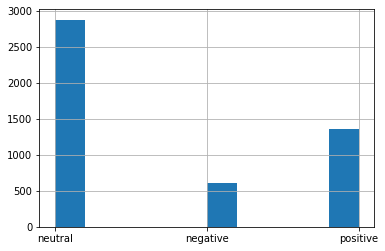

In [3]:
df["sentiment"].hist()

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [5]:
train_df, test_df = train_test_split(df, stratify=df["y"], test_size=0.1)

In [6]:
train_df["sentiment"].value_counts() / len(train_df)

neutral     0.594130
positive    0.281357
negative    0.124513
Name: sentiment, dtype: float64

In [7]:
test_df["sentiment"].value_counts() / len(test_df)

neutral     0.593814
positive    0.280412
negative    0.125773
Name: sentiment, dtype: float64

In [8]:
tf_vectorizer = CountVectorizer(max_df=0.99, min_df=2,
                                lowercase=True,
                                stop_words='english')
train_tf = tf_vectorizer.fit_transform(train_df["text"].values)

In [9]:
train_tf

<4361x4333 sparse matrix of type '<class 'numpy.int64'>'
	with 46828 stored elements in Compressed Sparse Row format>

In [10]:
tf_vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '012',
 '02',
 '03',
 '04',
 '045',
 '05',
 '06',
 '063',
 '07',
 '08',
 '084',
 '09',
 '10',
 '100',
 '100mn',
 '101',
 '102',
 '1023',
 '103',
 '104',
 '105',
 '106',
 '10mn',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '116',
 '117',
 '118',
 '12',
 '120',
 '122',
 '125',
 '129',
 '13',
 '130',
 '131',
 '133',
 '134',
 '135',
 '137',
 '138',
 '139',
 '14',
 '140',
 '142',
 '143',
 '145',
 '14mn',
 '15',
 '150',
 '150mn',
 '152',
 '155',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '164',
 '1649',
 '165',
 '168',
 '17',
 '170',
 '172',
 '18',
 '185',
 '187',
 '19',
 '190',
 '1930s',
 '194',
 '1944757',
 '1987',
 '1989',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2007a',
 '2008',
 '2009',
 '201',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '207',
 '20mn',
 '21',
 '211',
 '213',
 '215',
 '22',
 '220',
 '229',
 '23',
 '235',
 '24',
 '240',

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class="multinomial")
model.fit(train_tf, train_df["y"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
test_tf = tf_vectorizer.transform(test_df["text"])
test_preds = model.predict(test_tf)
accuracy_score(test_df["y"], test_preds)

0.7608247422680412

## Stemming words
eg: jumping -> jump, flying -> fly.

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sachinthaka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

In [15]:
df["text"][0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [16]:
ps = PorterStemmer() 
" ".join([ps.stem(word) for word in word_tokenize(df["text"][0])])

'accord to gran , the compani ha no plan to move all product to russia , although that is where the compani is grow .'

In [17]:
def stem_sentence(text):
    return " ".join([ps.stem(word) for word in word_tokenize(text)])

train_df["processed_text"] = train_df["text"].map(stem_sentence)
test_df["processed_text"] = test_df["text"].map(stem_sentence)

/Users/sachinthaka/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/sachinthaka/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
tf_vectorizer = CountVectorizer(max_df=0.99, min_df=2,
                                lowercase=True,
                                stop_words='english')

train_tf = tf_vectorizer.fit_transform(train_df["processed_text"].values)
train_tf.shape

(4361, 3494)

In [19]:
tf_vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '012',
 '02',
 '03',
 '04',
 '045',
 '05',
 '06',
 '063',
 '07',
 '08',
 '084',
 '09',
 '10',
 '100',
 '100mn',
 '101',
 '102',
 '1023',
 '103',
 '104',
 '105',
 '106',
 '10mn',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '116',
 '117',
 '118',
 '12',
 '120',
 '122',
 '125',
 '129',
 '13',
 '130',
 '131',
 '133',
 '134',
 '135',
 '137',
 '138',
 '139',
 '14',
 '140',
 '142',
 '143',
 '145',
 '14mn',
 '15',
 '150',
 '150mn',
 '152',
 '155',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '164',
 '1649',
 '165',
 '168',
 '17',
 '170',
 '172',
 '18',
 '185',
 '187',
 '19',
 '190',
 '1930',
 '194',
 '1944757',
 '1987',
 '1989',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2007a',
 '2008',
 '2009',
 '201',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '207',
 '20mn',
 '21',
 '211',
 '213',
 '215',
 '22',
 '220',
 '229',
 '23',
 '235',
 '24',
 '240',


In [20]:
model = LogisticRegression(multi_class="multinomial", max_iter=500)
model.fit(train_tf, train_df["y"])

test_tf = tf_vectorizer.transform(test_df["processed_text"])
test_preds = model.predict(test_tf)
accuracy_score(test_df["y"], test_preds)

0.7463917525773196

## Ngrams

In [21]:
tf_vectorizer = CountVectorizer(max_df=0.99, 
                                min_df=5,
                                lowercase=True,
                                stop_words='english', 
                                ngram_range=(1, 2) 
                               )

train_tf = tf_vectorizer.fit_transform(train_df["processed_text"].values)
train_tf.shape

(4361, 2511)

In [22]:
tf_vectorizer.get_feature_names()

['00',
 '00 eet',
 '000',
 '000 correspond',
 '000 eur',
 '000 euro',
 '000 new',
 '000 peopl',
 '000 sq',
 '000 squar',
 '000 tonn',
 '000 usd',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '10 000',
 '10 million',
 '10 mln',
 '10 mn',
 '10 percent',
 '100',
 '100 000',
 '105',
 '11',
 '11 million',
 '11 mln',
 '11 mn',
 '12',
 '12 million',
 '12 mn',
 '12 month',
 '120',
 '13',
 '13 mn',
 '130',
 '133',
 '14',
 '14 mn',
 '140',
 '15',
 '15 mln',
 '15 mn',
 '150',
 '16',
 '16 mn',
 '160',
 '17',
 '17 mn',
 '170',
 '18',
 '19',
 '1998',
 '1999',
 '20',
 '20 mn',
 '200',
 '200 000',
 '2000',
 '2001',
 '2003',
 '2004',
 '2005',
 '2006',
 '2006 mln',
 '2006 wa',
 '2007',
 '2008',
 '2008 compar',
 '2008 eur',
 '2008 finnish',
 '2009',
 '2009 eur',
 '2009 finnish',
 '2009 net',
 '2009 total',
 '2009 year',
 '2010',
 '2010 compani',
 '2010 eur',
 '2010 finnish',
 '2011',
 '2011 finnish',
 '2012',
 '2013',
 '21',
 '21 million',
 '21 mn',
 '22',
 '22 million',
 '23',


In [23]:
model = LogisticRegression(multi_class="multinomial", max_iter=500)
model.fit(train_tf, train_df["y"])

test_tf = tf_vectorizer.transform(test_df["processed_text"])
test_preds = model.predict(test_tf)
accuracy_score(test_df["y"], test_preds)

0.7525773195876289

In [24]:
model.coef_

array([[-0.38741956, -0.08273373,  0.06086277, ...,  0.2049551 ,
        -0.03271073,  0.28128895],
       [-0.10082371,  0.41239062,  0.04476934, ...,  0.21482971,
        -0.40512164, -0.20952928],
       [ 0.48824327, -0.32965689, -0.10563211, ..., -0.41978481,
         0.43783237, -0.07175967]])

In [25]:
(-model.coef_).argsort(axis=-1)[:,:10]

array([[ 648,  710,  646, 1361,  912, 1525, 2147, 1303,  347, 1304],
       [ 686, 1660, 1173,  285, 1634, 1889,   28,  501, 1856, 2241],
       [1061, 1177, 1990, 1170,  706, 2131, 2483, 1983,  870, 2233]])

In [26]:
idxs = (-model.coef_).argsort(axis=-1)[:,:10]
words = tf_vectorizer.get_feature_names()
for i, idx in enumerate(idxs):
    print(le.inverse_transform([i]))
    print([words[i] for i in idx])
    print("="*10)


['negative']
['decreas', 'drop', 'declin', 'lower', 'fell', 'neg', 'slip', 'lay', 'becaus', 'layoff']
['neutral']
['disclos', 'ownership', 'includ', 'approxim', 'organ', 'rang', '100 000', 'compani ad', 'publish', 'subscrib']
['positive']
['grew', 'increas', 'rose', 'improv', 'doubl', 'sign', 'won', 'rise', 'expand', 'strengthen']


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(test_df["y"], test_preds))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57        61
           1       0.81      0.88      0.84       288
           2       0.65      0.60      0.63       136

    accuracy                           0.75       485
   macro avg       0.70      0.66      0.68       485
weighted avg       0.74      0.75      0.75       485



Look at definitions in [this wikipedia article](https://en.wikipedia.org/wiki/Confusion_matrix).